# <font color='mediumseagreen'>Import các thư viện cần thiết</font>

In [1]:
# Read and work with dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Scale data
from sklearn.preprocessing import StandardScaler
# Train test split
from sklearn.model_selection import train_test_split
# Build model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# Evaluation model
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, make_scorer
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
# Feature extraction
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from datetime import datetime
# Imbalanced data
from imblearn.under_sampling import EditedNearestNeighbours, TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pd.options.mode.chained_assignment = None

In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
data = pd.read_csv('/kaggle/input/bankmarketing/bank-additional-full.csv', sep=';')

In [5]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# <font color='mediumseagreen'>Tiền xử lí dữ liệu</font>

#### <font color='mediumseagreen'>Check null</font>

In [6]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### <font color='mediumseagreen'>Check duplicate</font>

In [7]:
data.duplicated().sum()

12

In [8]:
data.drop_duplicates(inplace=True)

#### <font color='mediumseagreen'>Đổi 999 trong cột 'pday' thành 0</font>

In [9]:
data['pdays'] = data['pdays'].replace(999,0)

#### <font color='mediumseagreen'>Thay yes thành 1 và no thành 0 trong cột 'y'</font>

In [10]:
data = data.replace({'y': {'no': 0, 'yes': 1}})

#### <font color='mediumseagreen'>Mã hóa các cột định danh</font>

In [11]:
data = pd.get_dummies(data, columns=["job", "marital", "education", "default", "housing", "loan",
"contact", "month", "day_of_week", "poutcome"], drop_first=True)

#### <font color='mediumseagreen'>Chuẩn hóa dữ liệu theo Z-score</font>

In [12]:
scaler = StandardScaler()
data_sc = data.copy().drop(columns='y')
data_y = data['y']
data_scales = scaler.fit_transform(data_sc)
data = pd.DataFrame(data_scales, index=data_sc.index, columns=data_sc.columns)
data['y'] = data_y

### <font color='mediumseagreen'>Chọn biến X và Y</font>

In [13]:
X = data.drop(['duration', 'y'], axis=1)
Y = data["y"]

### <font color='mediumseagreen'>Chia dữ liệu thành 2 tập train, test (80:20)</font>

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# <font color='mediumseagreen'>Xây dựng mô hình</font>

In [15]:
list_model = []

#### <font color='mediumseagreen'>KNN</font>

In [16]:
error = []
# Calculating error for K values between 1 and 20
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
k_toi_uu = error.index(min(error)) + 1
print("Minimum error:-",min(error),"at K =", k_toi_uu)

Minimum error:- 0.10684798445847499 at K = 14


In [17]:
knn = KNeighborsClassifier(n_neighbors = k_toi_uu)
list_model.append(knn)

#### <font color='mediumseagreen'>Logistic Regression</font>

In [18]:
lr = LogisticRegression()
list_model.append(lr)

#### <font color='mediumseagreen'>Random Forest</font>

In [19]:
rf = RandomForestClassifier()
list_model.append(rf)

#### <font color='mediumseagreen'>Naive Bayes</font>

In [20]:
nb = GaussianNB()
list_model.append(nb)

#### <font color='mediumseagreen'>Neural Network</font>

In [21]:
mlp = MLPClassifier()
list_model.append(mlp)

#### <font color='mediumseagreen'>SVC</font>

In [22]:
svc = SVC(kernel="linear")
list_model.append(svc)

# <font color='mediumseagreen'>Đánh giá mô hình</font>

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model name,Accuracy (%),Precision,Recall,F1-score,Running time
1,Logistic Regression,89.38,0.67,0.20,0.31,0:00:00.538182
2,SVC,89.33,0.67,0.19,0.29,0:00:51.876871
3,KNN,89.32,0.64,0.21,0.32,0:00:02.098886
4,Random Forest,88.62,0.53,0.27,0.36,0:00:05.633828
5,Neural Network,88.42,0.52,0.28,0.37,0:00:50.619575
6,Naive Bayes,72.94,0.26,0.70,0.38,0:00:00.060354


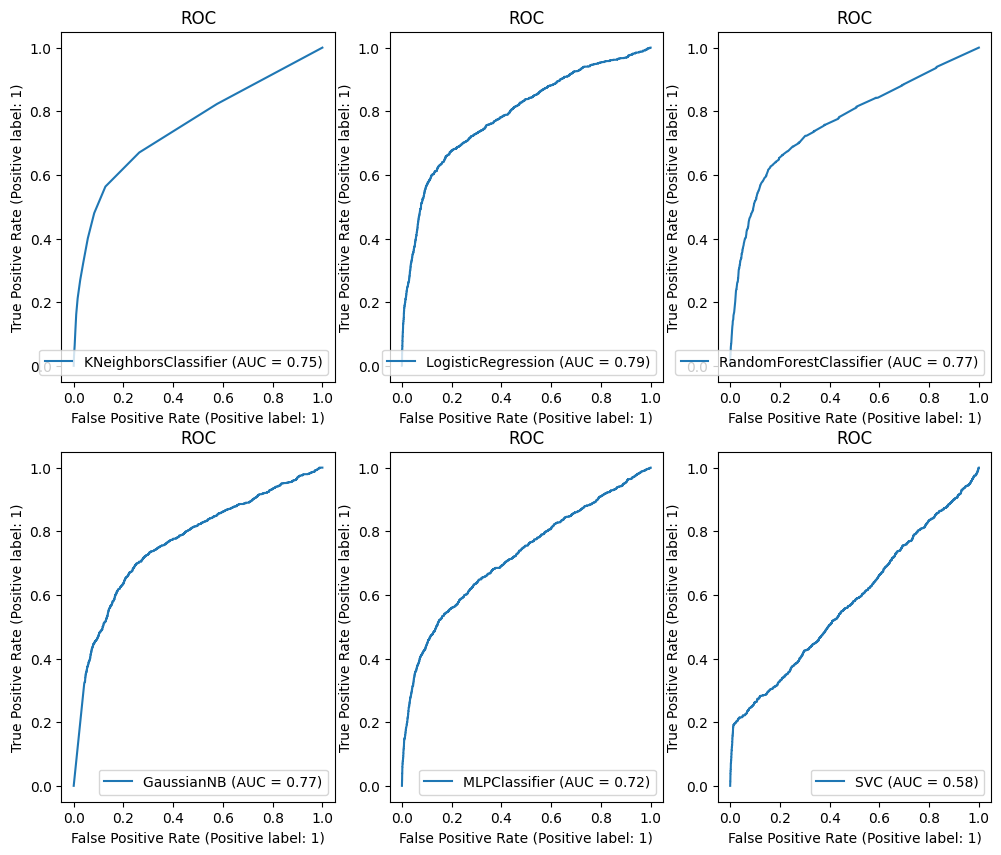

In [23]:
# Create a figure with 2 rows and 3 columns
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))

model_eval = []
model_name = ['KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', "Neural Network", "SVC"]
i = 0

for model in list_model:
    start_time = datetime.now()
    
    eval_dict = {}
    eval_dict['Model name'] = model_name[i]
    i += 1
    
    # Xây dựng mô hình
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Model accuracy
    acc_score = accuracy_score(y_test, y_pred)
    eval_dict['Accuracy (%)'] = round(acc_score, 4)*100
    
    # Model precision
    precision = precision_score(y_test, y_pred)
    eval_dict['Precision'] = round(precision, 2)
    
    # Modell recall
    recall = recall_score(y_test, y_pred)
    eval_dict['Recall'] = round(recall, 2)

    # Model F1 score
    f1_score = metrics.f1_score(y_test, y_pred)
    eval_dict['F1-score'] = round(f1_score, 2)
    
    # Model ROC and AUC
    ax = axs[(i-1)//3, (i-1)%3]
    RocCurveDisplay.from_estimator(model, x_test, y_test, ax=ax)
    ax.set(title="ROC")
    
    # Running time
    end_time = datetime.now()
    eval_dict['Running time'] = '{}'.format(end_time - start_time)
    
    model_eval.append(eval_dict)

model_eval = pd.DataFrame(model_eval).sort_values('Accuracy (%)', ascending=False)
model_eval.reset_index(drop=True, inplace=True)
model_eval.index +=1
model_eval

# <font color='mediumseagreen'>Imbalanced data</font>

In [24]:
X_res = data.drop(columns='y')
Y_res = data['y']

0    36537
1     4639
Name: y, dtype: int64


<AxesSubplot: ylabel='y'>

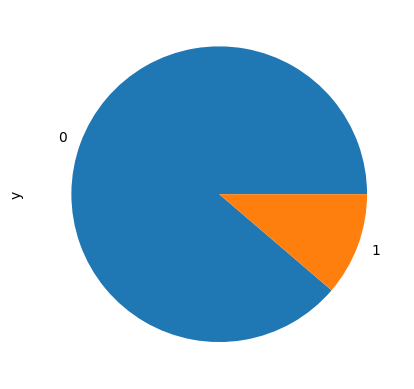

In [25]:
print(Y_res.value_counts())
Y_res.value_counts().plot(kind='pie')

## <font color='mediumseagreen'>Under-sampling</font>

### <font color='mediumseagreen'>EditedNearestNeighbours (ENN)</font>

In [26]:
enn = EditedNearestNeighbours()

X_enn, Y_enn = enn.fit_resample(X_res,Y_res)

0    31598
1     4639
Name: y, dtype: int64


<AxesSubplot: ylabel='y'>

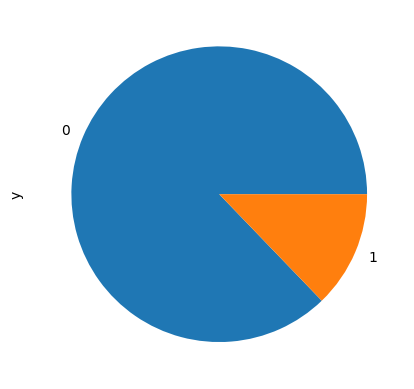

In [27]:
print(Y_enn.value_counts())
Y_enn.value_counts().plot(kind='pie')

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model name,Accuracy (%),Precision,Recall,F1-score,Running time
1,Random Forest,92.78,0.85,0.55,0.66,0:00:04.600023
2,Neural Network,91.69,0.77,0.52,0.62,0:00:46.594461
3,KNN,91.29,0.84,0.42,0.56,0:00:01.548336
4,Logistic Regression,91.25,0.77,0.47,0.59,0:00:00.432891
5,SVC,90.98,0.72,0.51,0.60,0:47:46.365858
6,Naive Bayes,83.57,0.41,0.62,0.50,0:00:00.054683


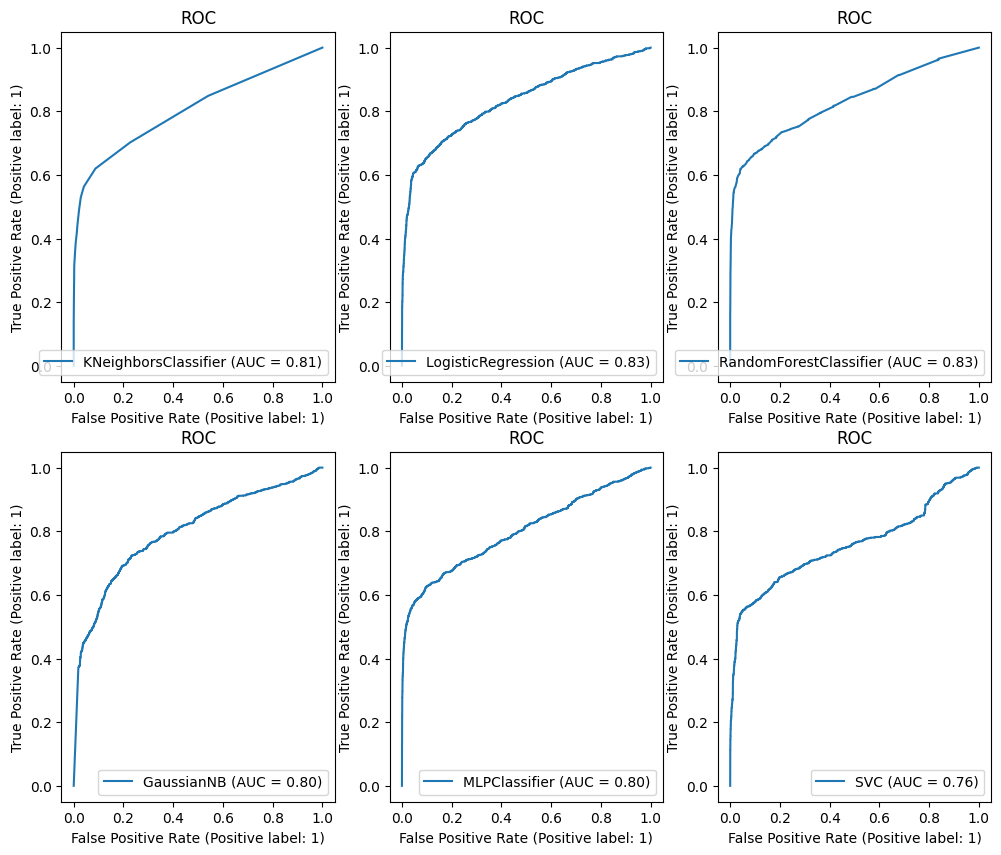

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X_enn.drop(columns='duration'), Y_enn, test_size = 0.2, random_state = 42)

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))

model_eval_enn = []
model_name = ['KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', "Neural Network", "SVC"]
i = 0

for model in list_model:
    start_time = datetime.now()
    
    eval_dict = {}
    eval_dict['Model name'] = model_name[i]
    i += 1
    
    # Xây dựng mô hình
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Model accuracy
    acc_score = accuracy_score(y_test, y_pred)
    eval_dict['Accuracy (%)'] = round(acc_score, 4)*100
    
    # Model precision
    precision = precision_score(y_test, y_pred)
    eval_dict['Precision'] = round(precision, 2)
    
    # Modell recall
    recall = recall_score(y_test, y_pred)
    eval_dict['Recall'] = round(recall, 2)

    # Model F1 score
    f1_score = metrics.f1_score(y_test, y_pred)
    eval_dict['F1-score'] = round(f1_score, 2)
    
    # Model ROC and AUC
    ax = axs[(i-1)//3, (i-1)%3]
    RocCurveDisplay.from_estimator(model, x_test, y_test, ax=ax)
    ax.set(title="ROC")

    # Running time
    end_time = datetime.now()
    eval_dict['Running time'] = '{}'.format(end_time - start_time)
    
    model_eval_enn.append(eval_dict)

model_eval_enn = pd.DataFrame(model_eval_enn).sort_values('Accuracy (%)', ascending=False)
model_eval_enn.reset_index(drop=True, inplace=True)
model_eval_enn.index +=1
model_eval_enn

### <font color='mediumseagreen'>Tomek Links</font>

In [29]:
tl = TomekLinks()

X_tl, Y_tl = tl.fit_resample(X_res,Y_res)

0    35337
1     4639
Name: y, dtype: int64


<AxesSubplot: ylabel='y'>

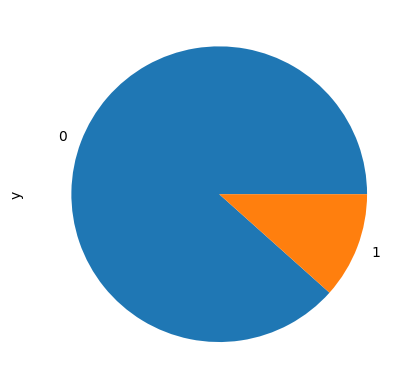

In [30]:
print(Y_tl.value_counts())
Y_tl.value_counts().plot(kind='pie')

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model name,Accuracy (%),Precision,Recall,F1-score,Running time
1,Random Forest,90.33,0.64,0.38,0.47,0:00:05.360165
2,Logistic Regression,90.21,0.68,0.29,0.40,0:00:00.347661
3,KNN,90.06,0.67,0.27,0.39,0:00:01.814780
4,SVC,90.02,0.75,0.21,0.32,0:01:04.966989
5,Neural Network,89.17,0.55,0.38,0.45,0:00:48.845519
6,Naive Bayes,75.25,0.28,0.70,0.40,0:00:00.056713


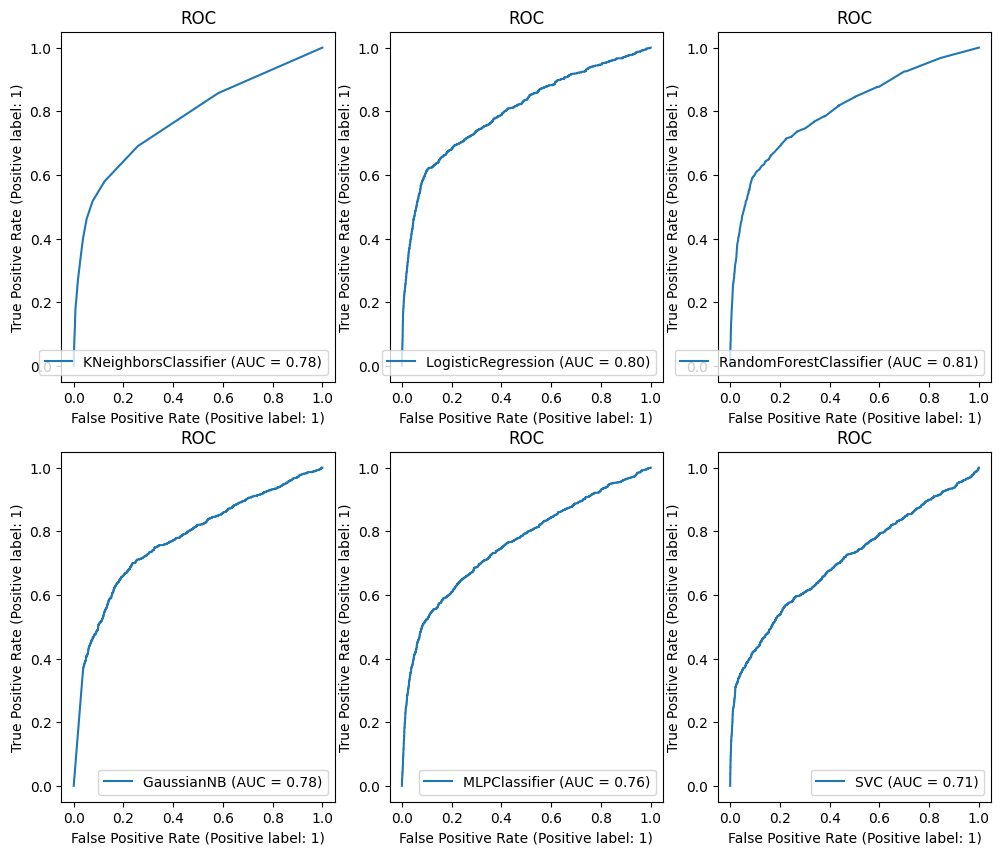

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X_tl.drop(columns='duration'), Y_tl, test_size = 0.2, random_state = 42)

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))

model_eval_tl = []
model_name = ['KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', "Neural Network", "SVC"]
i = 0

for model in list_model:
    start_time = datetime.now()
    
    eval_dict = {}
    eval_dict['Model name'] = model_name[i]
    i += 1
    
    # Xây dựng mô hình
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Model accuracy
    acc_score = accuracy_score(y_test, y_pred)
    eval_dict['Accuracy (%)'] = round(acc_score, 4)*100
    
    # Model precision
    precision = precision_score(y_test, y_pred)
    eval_dict['Precision'] = round(precision, 2)
    
    # Modell recall
    recall = recall_score(y_test, y_pred)
    eval_dict['Recall'] = round(recall, 2)

    # Model F1 score
    f1_score = metrics.f1_score(y_test, y_pred)
    eval_dict['F1-score'] = round(f1_score, 2)
    
    # Model ROC and AUC
    ax = axs[(i-1)//3, (i-1)%3]
    RocCurveDisplay.from_estimator(model, x_test, y_test, ax=ax)
    ax.set(title="ROC")

    # Running time
    end_time = datetime.now()
    eval_dict['Running time'] = '{}'.format(end_time - start_time)
    
    model_eval_tl.append(eval_dict)

model_eval_tl = pd.DataFrame(model_eval_tl).sort_values('Accuracy (%)', ascending=False)
model_eval_tl.reset_index(drop=True, inplace=True)
model_eval_tl.index +=1
model_eval_tl

## <font color='mediumseagreen'>Over-sampling</font>

### <font color='mediumseagreen'>SMOTE</font>

In [32]:
sm = SMOTE()

X_sm, Y_sm = sm.fit_resample(X_res, Y_res)

0    36537
1    36537
Name: y, dtype: int64


<AxesSubplot: ylabel='y'>

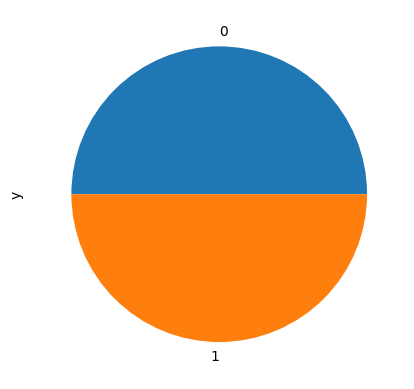

In [33]:
print(Y_sm.value_counts())
Y_sm.value_counts().plot(kind='pie')

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model name,Accuracy (%),Precision,Recall,F1-score,Running time
1,Random Forest,93.81,0.95,0.93,0.94,0:00:12.224109
2,Neural Network,88.53,0.89,0.88,0.88,0:01:31.435120
3,KNN,80.73,0.76,0.89,0.82,0:00:05.511117
4,Logistic Regression,74.12,0.80,0.64,0.71,0:00:00.722362
5,SVC,73.68,0.81,0.61,0.70,0:56:40.122693
6,Naive Bayes,69.91,0.68,0.76,0.71,0:00:00.097359


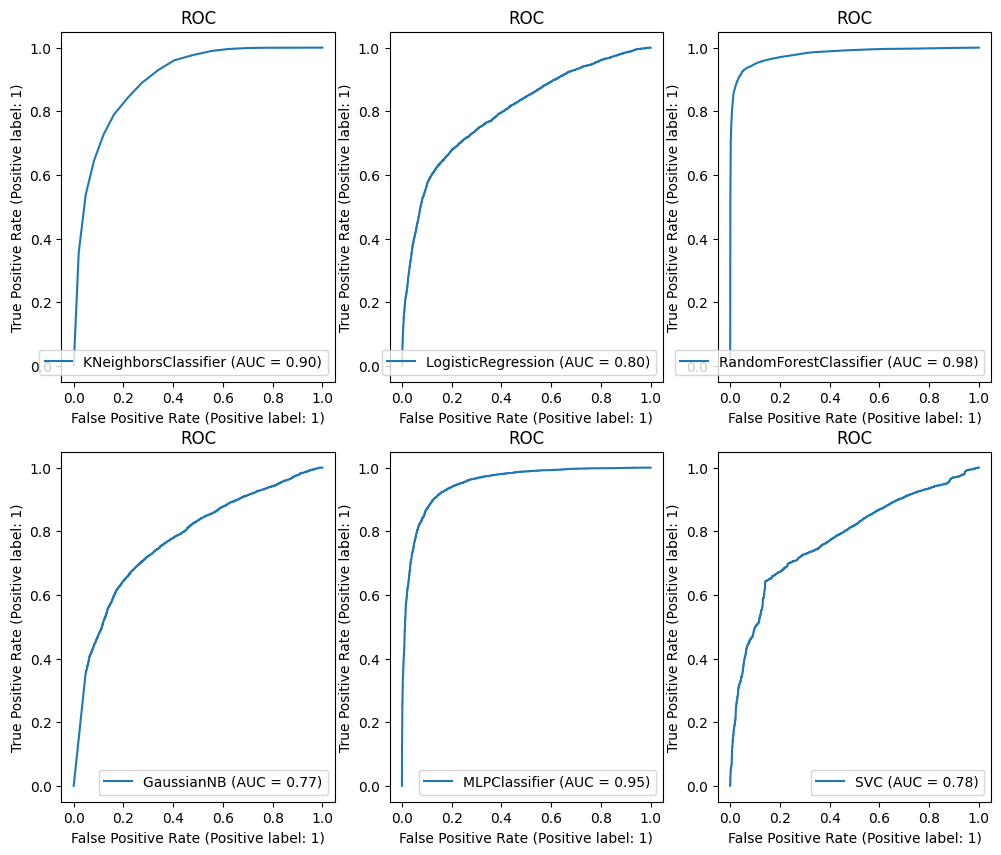

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X_sm.drop(columns='duration'), Y_sm, test_size = 0.2, random_state = 42)

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))

model_eval_sm = []
model_name = ['KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', "Neural Network", "SVC"]
i = 0

for model in list_model:
    start_time = datetime.now()
    
    eval_dict = {}
    eval_dict['Model name'] = model_name[i]
    i += 1
    
    # Xây dựng mô hình
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Model accuracy
    acc_score = accuracy_score(y_test, y_pred)
    eval_dict['Accuracy (%)'] = round(acc_score, 4)*100
    
    # Model precision
    precision = precision_score(y_test, y_pred)
    eval_dict['Precision'] = round(precision, 2)
    
    # Modell recall
    recall = recall_score(y_test, y_pred)
    eval_dict['Recall'] = round(recall, 2)

    # Model F1 score
    f1_score = metrics.f1_score(y_test, y_pred)
    eval_dict['F1-score'] = round(f1_score, 2)
    
    # Model ROC and AUC
    ax = axs[(i-1)//3, (i-1)%3]
    RocCurveDisplay.from_estimator(model, x_test, y_test, ax=ax)
    ax.set(title="ROC")

    # Running time
    end_time = datetime.now()
    eval_dict['Running time'] = '{}'.format(end_time - start_time)
    
    model_eval_sm.append(eval_dict)

model_eval_sm = pd.DataFrame(model_eval_sm).sort_values('Accuracy (%)', ascending=False)
model_eval_sm.reset_index(drop=True, inplace=True)
model_eval_sm.index +=1
model_eval_sm

## <font color='mediumseagreen'>Kết hợp over và under-sampling</font>

### <font color='mediumseagreen'>SMOTEENN (SMOTE + EditedNearestNeighbours)</font>

In [35]:
sme = SMOTEENN(random_state=42)

X_sme, Y_sme = sme.fit_resample(X_res, Y_res)

1    35265
0    30339
Name: y, dtype: int64


<AxesSubplot: ylabel='y'>

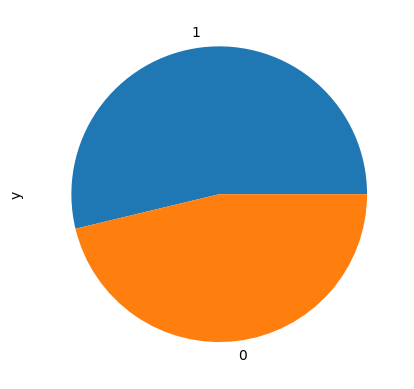

In [36]:
print(Y_sme.value_counts())
Y_sme.value_counts().plot(kind='pie')

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model name,Accuracy (%),Precision,Recall,F1-score,Running time
1,Random Forest,96.56,0.98,0.95,0.97,0:00:09.630297
2,Neural Network,92.91,0.94,0.93,0.93,0:01:21.217201
3,KNN,85.62,0.84,0.91,0.87,0:00:04.479341
4,Logistic Regression,77.55,0.88,0.68,0.77,0:00:00.804829
5,SVC,76.69,0.92,0.62,0.74,0:35:29.038933
6,Naive Bayes,75.17,0.85,0.66,0.74,0:00:00.087224


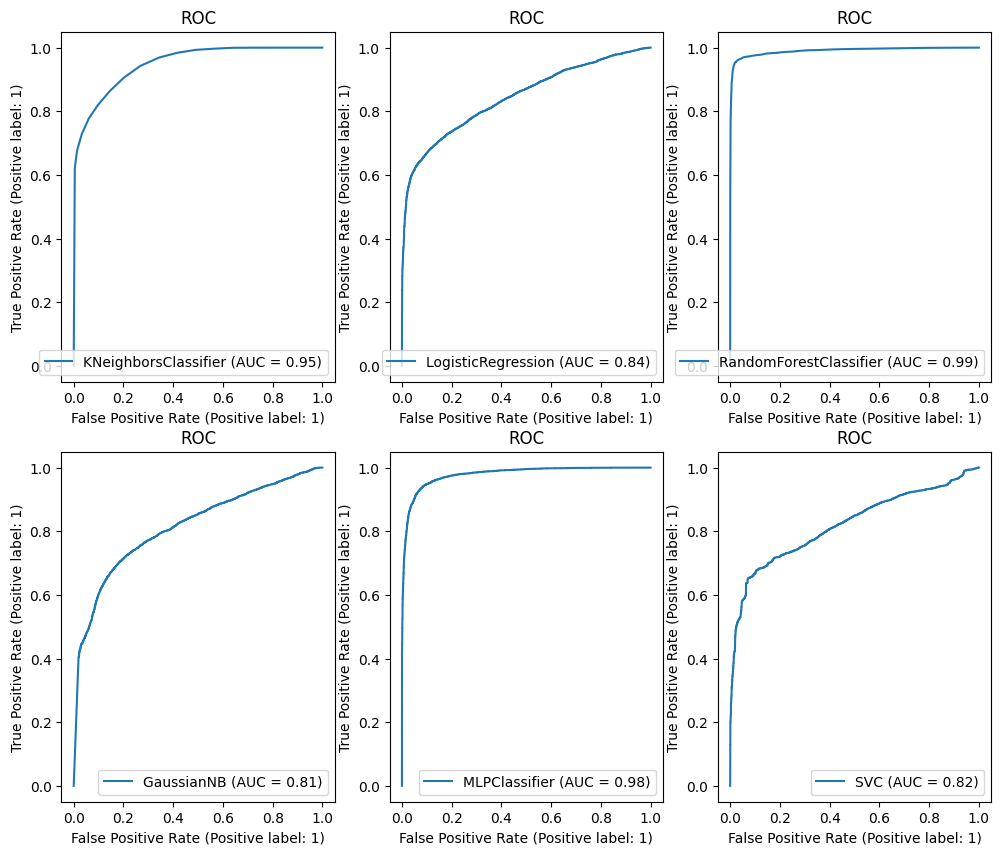

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X_sme.drop(columns='duration'), Y_sme, test_size = 0.2, random_state = 42)

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))

model_eval_sme = []
model_name = ['KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', "Neural Network", "SVC"]
i = 0

for model in list_model:
    start_time = datetime.now()
    
    eval_dict = {}
    eval_dict['Model name'] = model_name[i]
    i += 1
    
    # Xây dựng mô hình
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Model accuracy
    acc_score = accuracy_score(y_test, y_pred)
    eval_dict['Accuracy (%)'] = round(acc_score, 4)*100
    
    # Model precision
    precision = precision_score(y_test, y_pred)
    eval_dict['Precision'] = round(precision, 2)
    
    # Modell recall
    recall = recall_score(y_test, y_pred)
    eval_dict['Recall'] = round(recall, 2)

    # Model F1 score
    f1_score = metrics.f1_score(y_test, y_pred)
    eval_dict['F1-score'] = round(f1_score, 2)
    
    # Model ROC and AUC
    ax = axs[(i-1)//3, (i-1)%3]                    
    RocCurveDisplay.from_estimator(model, x_test, y_test, ax=ax)
    ax.set(title="ROC")

    # Running time
    end_time = datetime.now()
    eval_dict['Running time'] = '{}'.format(end_time - start_time)
    
    model_eval_sme.append(eval_dict)

model_eval_sme = pd.DataFrame(model_eval_sme).sort_values('Accuracy (%)', ascending=False)
model_eval_sme.reset_index(drop=True, inplace=True)
model_eval_sme.index +=1
model_eval_sme

### <font color='mediumseagreen'>SMOTETomek (SMOTE + TomekLinks)</font>

In [38]:
smt = SMOTETomek(random_state=42)

X_smt, Y_smt = smt.fit_resample(X_res, Y_res)

0    36451
1    36451
Name: y, dtype: int64


<AxesSubplot: ylabel='y'>

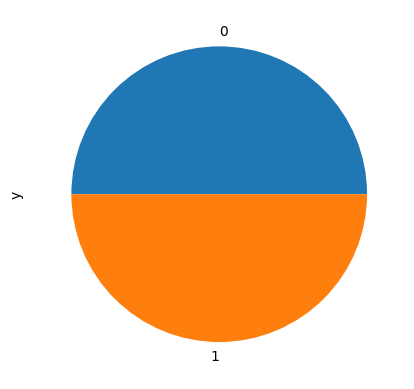

In [39]:
print(Y_smt.value_counts())
Y_smt.value_counts().plot(kind='pie')

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model name,Accuracy (%),Precision,Recall,F1-score,Running time
1,Random Forest,94.14,0.95,0.93,0.94,0:00:12.126110
2,Neural Network,89.11,0.89,0.89,0.89,0:01:30.264323
3,KNN,81.13,0.77,0.89,0.82,0:00:05.511539
4,Logistic Regression,73.88,0.79,0.64,0.71,0:00:00.610510
5,SVC,73.47,0.81,0.61,0.69,0:50:45.167705
6,Naive Bayes,69.93,0.68,0.75,0.71,0:00:00.094403


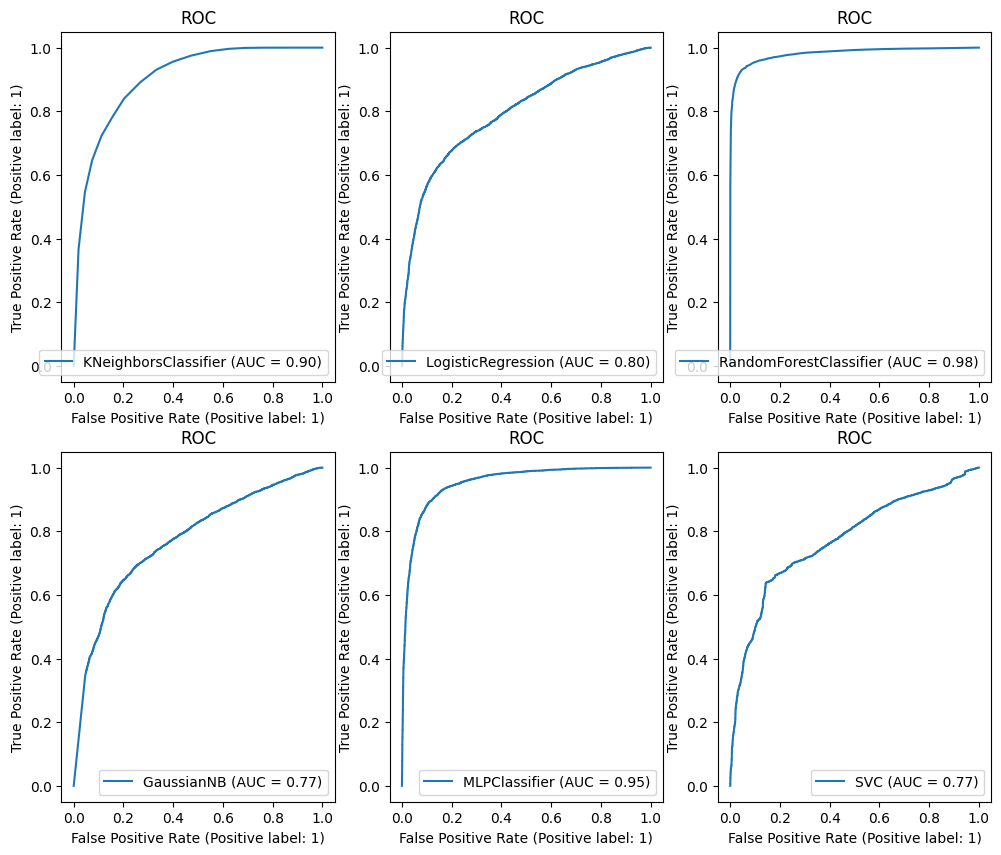

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X_smt.drop(columns='duration'), Y_smt, test_size = 0.2, random_state = 42)

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))

model_eval_smt = []
model_name = ['KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', "Neural Network", "SVC"]
i = 0

for model in list_model:
    start_time = datetime.now()
    
    eval_dict = {}
    eval_dict['Model name'] = model_name[i]
    i += 1
    
    # Xây dựng mô hình
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Model accuracy
    acc_score = accuracy_score(y_test, y_pred)
    eval_dict['Accuracy (%)'] = round(acc_score, 4)*100
    
    # Model precision
    precision = precision_score(y_test, y_pred)
    eval_dict['Precision'] = round(precision, 2)
    
    # Modell recall
    recall = recall_score(y_test, y_pred)
    eval_dict['Recall'] = round(recall, 2)

    # Model F1 score
    f1_score = metrics.f1_score(y_test, y_pred)
    eval_dict['F1-score'] = round(f1_score, 2)
    
    # Model ROC and AUC
    ax = axs[(i-1)//3, (i-1)%3]                   
    RocCurveDisplay.from_estimator(model, x_test, y_test, ax=ax)
    ax.set(title="ROC")

    # Running time
    end_time = datetime.now()
    eval_dict['Running time'] = '{}'.format(end_time - start_time)
    
    model_eval_smt.append(eval_dict)

model_eval_smt = pd.DataFrame(model_eval_smt).sort_values('Accuracy (%)', ascending=False)
model_eval_smt.reset_index(drop=True, inplace=True)
model_eval_smt.index +=1
model_eval_smt

# <font color='mediumseagreen'>So sánh các phương pháp</font>

In [41]:
res_list = [model_eval,
            model_eval_enn, model_eval_tl,
            model_eval_sm,
            model_eval_sme, model_eval_smt]

In [42]:
res_name = ['Imbalanced data', 'ENN', 'Tomek Links', 'SMOTE', 'SMOTEENN', 'SMOTETomek']
i = 0
compare_res = []

for res in res_list:
    res_dict = {}
    
    res_dict['Res method'] = res_name[i]
    i += 1
    
    res_dict['AVG Accuracy'] = res['Accuracy (%)'].mean()
    res_dict['AVG Precision'] = res['Precision'].mean()
    res_dict['AVG Recall'] = res['Recall'].mean()
    res_dict['AVG F1-score'] = res['F1-score'].mean()
    
    compare_res.append(res_dict)

compare_res = pd.DataFrame(compare_res)

In [43]:
compare_res

,Res method,AVG Accuracy,AVG Precision,AVG Recall,AVG F1-score
0,Imbalanced data,86.335000,0.548333,0.308333,0.338333
1,ENN,90.260000,0.726667,0.515000,0.588333
2,Tomek Links,87.506667,0.595000,0.371667,0.405000
3,SMOTE,80.130000,0.815000,0.785000,0.793333
4,SMOTEENN,84.083333,0.901667,0.791667,0.836667
5,SMOTETomek,80.276667,0.815000,0.785000,0.793333


## <font color='mediumseagreen'>So sánh theo Accuracy</font>

In [44]:
compare_res.sort_values('AVG Accuracy', ascending=False)

,Res method,AVG Accuracy,AVG Precision,AVG Recall,AVG F1-score
1,ENN,90.260000,0.726667,0.515000,0.588333
2,Tomek Links,87.506667,0.595000,0.371667,0.405000
0,Imbalanced data,86.335000,0.548333,0.308333,0.338333
4,SMOTEENN,84.083333,0.901667,0.791667,0.836667
5,SMOTETomek,80.276667,0.815000,0.785000,0.793333
3,SMOTE,80.130000,0.815000,0.785000,0.793333


## <font color='mediumseagreen'>So sánh theo Precision</font>

In [45]:
compare_res.sort_values('AVG Precision', ascending=False)

,Res method,AVG Accuracy,AVG Precision,AVG Recall,AVG F1-score
4,SMOTEENN,84.083333,0.901667,0.791667,0.836667
5,SMOTETomek,80.276667,0.815000,0.785000,0.793333
3,SMOTE,80.130000,0.815000,0.785000,0.793333
1,ENN,90.260000,0.726667,0.515000,0.588333
2,Tomek Links,87.506667,0.595000,0.371667,0.405000
0,Imbalanced data,86.335000,0.548333,0.308333,0.338333


## <font color='mediumseagreen'>So sánh theo Recall</font>

In [46]:
compare_res.sort_values('AVG Recall', ascending=False)

,Res method,AVG Accuracy,AVG Precision,AVG Recall,AVG F1-score
4,SMOTEENN,84.083333,0.901667,0.791667,0.836667
3,SMOTE,80.130000,0.815000,0.785000,0.793333
5,SMOTETomek,80.276667,0.815000,0.785000,0.793333
1,ENN,90.260000,0.726667,0.515000,0.588333
2,Tomek Links,87.506667,0.595000,0.371667,0.405000
0,Imbalanced data,86.335000,0.548333,0.308333,0.338333


## <font color='mediumseagreen'>So sánh theo F1-score</font>

In [47]:
compare_res.sort_values('AVG F1-score', ascending=False)

,Res method,AVG Accuracy,AVG Precision,AVG Recall,AVG F1-score
4,SMOTEENN,84.083333,0.901667,0.791667,0.836667
3,SMOTE,80.130000,0.815000,0.785000,0.793333
5,SMOTETomek,80.276667,0.815000,0.785000,0.793333
1,ENN,90.260000,0.726667,0.515000,0.588333
2,Tomek Links,87.506667,0.595000,0.371667,0.405000
0,Imbalanced data,86.335000,0.548333,0.308333,0.338333
